In [70]:
import scipy.io
frey = scipy.io.loadmat("/Users/mpiekenbrock/Downloads/frey_rawface.mat")
faces = frey['ff'].T


In [72]:
import pickle
with open('../data/frey_faces.pickle', 'wb') as handle:
    pickle.dump(faces, handle, protocol=pickle.HIGHEST_PROTOCOL)

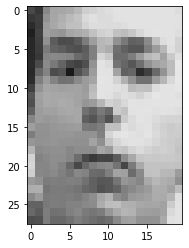

In [17]:
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(faces[500,:].reshape((28,20)), cmap='gray', vmin=0, vmax=255)
plt.show()


In [18]:
base_face = faces[500,:].reshape((28,20))

In [65]:
#noise = np.random.normal(size=(28*3, 20*3))
#skimage.util.random_noise(img, mode=mode)
#import cv2


def embed_face(x,y):
	noise = np.random.normal(loc=0, scale=1, size=(59, 51))
	image = 255*((noise - noise.min())/(noise.max()-noise.min()))
	image[x:(x+28), y:(y+20)] = base_face
	return(image)

embedded_faces = []
for x in range(0, 32):
	for y in range(0, 32):
		embedded_faces.append(embed_face(x,y))

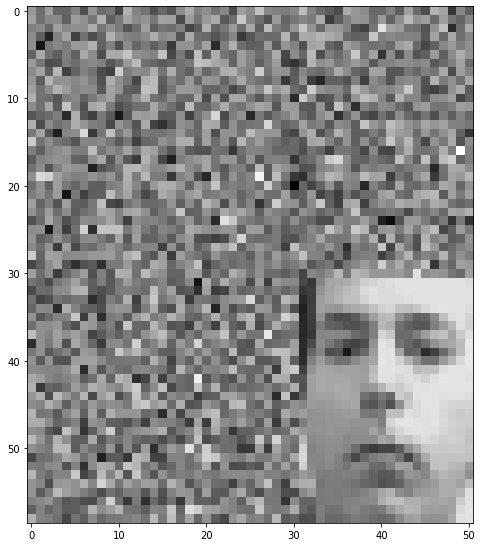

In [68]:
plt.figure(figsize=(8, 15))
plt.imshow(embedded_faces[len(embedded_faces)-1].reshape(59, 51), cmap='gray', vmin=0, vmax=255)
# plt.imshow(embed_face(31,31).reshape(59, 51), cmap='gray', vmin=0, vmax=255) 
plt.show()

In [69]:
face_data = np.vstack([np.ravel(face) for face in embedded_faces])
import pickle
with open('../data/frey_face_embedded.pickle', 'wb') as handle:
    pickle.dump(face_data, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [49]:
# from src.tallem import TALLEM
# from src.tallem.cover import IntervalCover
# from src.tallem.datasets import mobius_band
# from src.tallem.dimred import mmds
# from src.tallem.distance import dist

ModuleNotFoundError: No module named 'src.tallem'